## Домашняя работа №1. Titanik
Дедлайн -- **11.10.18 23:59**

Выполненные задания можно либо присылать на почту gaintseva@phystech.edu, либо загружать в папку в своем репозитории на GitHub. Если загружаете в репозиторий, после загрузки выполненного дз делайте pull request в мой репозиторий или пишите мне в телеграме/на почту, что сделали домашнее задание.

----------------------

В этом задании мы с помощью изученных на семинаре библиотек поиграемся с датасетом Titanik для вот это соренования: https://www.kaggle.com/c/titanic

В этом задании мы не будем тренировать модели и предсказывать результаты, а только научимся работать с данными, обрабатывать из так, чтобы после на них можно было обучать модели машинного обучения. Это пригодится Вам на следующем занятии.

Данные скачивать с сайта не нужно, они уже лежат в папке рядом с этим ноутбуком.

Начем!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Часть 1. Смотрим на данные

#### Задание 1.1

С помощью библиоткеи pandas загрузите данные из файла train_titanik.csv в память и выведите первые 5 записей на экран:

In [2]:
data = pd.read_csv('train_titanik.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Как видно, в данных есть пропуски (NAN), некоторые данные категориальные (не числовые). Как мы помним с предыдущего занятия, чтобы на этих данных можно было обучать модели, нужно заполнить пропуски (избавиться от NaN) и перевести категориальные признаки в числовые. Этим мы и займемся.

#### Задание 1.2

Выделим из данных колонку с ответами (целевой переменной, Y) и в data оставим все остальные колонки

P.S. можно (и желательно) воспользоваться методом drop(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html:

In [3]:
y = data['Survived']
data = data.drop(columns='Survived')

Давайте для начала посмотрим, какие в данных есть колонки и какого типа данные в низ записаны:

In [4]:
print(data.columns)
print(data.dtypes)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


И также посмотрим, в каких столбцах данных содержатся NaN:

In [5]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

#### Задание 1.3

Если хотите, можете посмотреть на связь разных признаков между собой на картинке. Заметьте, что пока мы не перевели категориальные признаки в числовые, мы можем смотреть только на числовые признаки. Давайте, например, посмотрим на связь признаков Age и SibSp 

(подсказка: для этого подойдет функция scatter(), пример ее применения можно найти из семинара или документации matplotlib. Не забудтьте раскрасить точки в 2 цвета в зависимости от значений целевой переменной):

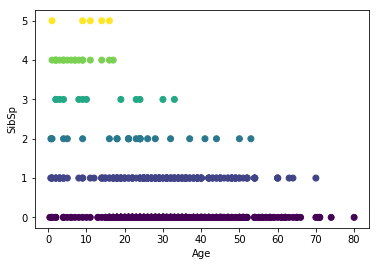

In [6]:
plt.scatter(data['Age'], data['SibSp'], c=data['SibSp'])
plt.xlabel('Age')
plt.ylabel('SibSp')

### Часть 2: Заполнение NaN

Начнем с того, что заполним NaN в колонках, где они есть, какими-нибудь значениями. Для того, чтобы лучше понять, какие значения для пропусков выбрать, полезно посмотреть на данные с точки зрения каких-нибудь статистик (найти среднее по колонке, медиану, самое часто встречающееся значения и т.п.) 

#### 1.
Возраст человека может быть любым чтслом от 0 до \inf. Поэтому, кажется, что для колонки Age смотреть на количество строк с каждым отдельным значеним не имеет смысла. Больший смысл имеет найти значения статистик.

#### Задание 2.1: 
Для колонки Age найдите ее максимальное, минимальное, среднее значения и медиану, напечатайте результаты 

(подсказка: если поиск этих значений работает долго, вспомните, что для np.array() это все будет работать намного быстрее): 

In [7]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### 2. 
Колонка Embarked, наоборот, содержит категориальный признак, который имеет мало разных значений в датасете. Поэтому для него как раз имеет смысл найти количества записей с каждым значением в датасете.

#### Задание 2.2: 
Для колонки Embarked для каждого значения в этой колонке найдите, сколько раз оно встречается. 

(подсказка: Это можно сделать руками, а можно с помощью метода describe())

In [8]:
n = 0
for item in set(data['Embarked'].values):
    n_i = data['Embarked'][data['Embarked'] == item].describe().iloc[0]
    n += n_i
    print('count for '+str(item)+' from the column "Embarked" is', n_i)
print('count for nan from the column "Embarked" is ' + str(data['Embarked'].shape[0] - n))

count for nan from the column "Embarked" is 0
count for S from the column "Embarked" is 644
count for Q from the column "Embarked" is 77
count for C from the column "Embarked" is 168
count for nan from the column "Embarked" is 2


#### 3.
А вот что делать с колонкой Cabin, сразу непонятно. Она категориальная, и значений в ней много разных. 

#### Задание 2.3: 
Выведите описание столбца Cabin с помощью describe()

In [9]:
data['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

#### 4.
Теперь, когда мы видим перед собой больше информации о колонках с NaN, пора эти NaN на что-нибудь заменить. На что -- решать Вам. Не обязательно при этом использовать те величины, которые мы находили в пунктах 2.1 - 2.3.

#### Задание 2.4: 
Заполните пропуски в data отдельно для Age, Embarked и Cabin. Объясните, почему Вы решили заполнить их именно так.

P.S. NaN удобно заменять с помощью метода .fillna() (о нем было на семинаре, можно посмотреть в ноутбуке numpy.ipynb). Обратите внимание, что метод НЕ изменяет объект, к которому был применен, а возвращает новый.

In [10]:
data['Age'] = data['Age'].fillna(value=data['Age'].describe().loc['50%'])
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].describe().loc['top'])
data['Cabin'] = data['Cabin'].fillna(value='Z1')

#### Пояснение
Для возраста берем медиану, потому что она устойчивее среднего (хотя в этом датасете они близки по значению).
В колонке 'Embarked' заполним 2 пропуска из почти 900 значений наиболее популярным среди трех различных. Пропусков мало, так что можно взять наиболее популярное значение.
С каютой не очень понятно. Пропусков больше, чем непустых значений. Различных значений очень много. По сути первая буква в номере каюты соответствует палубе, а это приводит нас к классу билета (1, 2 или 3). Поскольку у нас есть полная информация о классе, то ожидается, что переменная с номером каюты даст нам мало новой информации, особенно учитывая большое количество пропусков. Заполним пропуски новым значением 'Z1'.

Все, теперь в data не должно быть NaN. Код в ячейке ниже это проверяет. Если он выдал ошибку, значит, Вы не избавились от всех NaN в данных

In [11]:
assert not data.isnull().values.any()

### Часть 3. Перевод категориальных признаков в числа

Как мы помним с лекции, модели (за редким исключением) умеют работать только с числовыми признаками. Поэтому все нечисловые признаки придется превратить в числовые. Этим мы сейчас и займемся.

#### Задание 3.1

Для начала давайте подумаем, что делать с колонкой Name. В ней каждое значение уникальное, и если превращать эти значения в числа, каждому человеку мы поставим в соответствие уникальное число. То есть, получится колонка такая же, как PassengerId. Наверное, нам это не нужно. Поэтому давайте просто удалим эту колонку:

P.S. можно (и желательно) воспользоваться методом drop(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html:

In [12]:
data = data.drop(columns='Name')

Посмотрим опять, какие данные у нас остались и что пока получилось:

In [13]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,Z1,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Z1,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,Z1,S


In [14]:
print(data.columns)
print(data.dtypes)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [15]:
data["Sex"].dtypes == object

True

#### Задание 3.2
Напишите функцию, которая будет превращать колонку с категориальными признаками в колонку с числовыми признаками:

(подсказка: будет работать быстрее, если работать не с pd.DataFrame, а перевести в np.array())

In [16]:
def categorical_to_numeric(column):
    """
    column: колонка значений типа pd.DataFrame
    функция возвращает np.array() с новыми числовыми значениями этой колонки
    """
    d = {}
    i = 0
    for item in set(column.values):
        d[item] = i
        i += 1
    N = column.values.shape[0]
    output = np.zeros(N)
    for j in range(N):
        output[j] = d[column.values[j]]
    return output

Переведем колонки и категориальными признаками в числовые с помощью только что написанной Вами функции:

In [17]:
for column in data.columns:
    if data[column].dtypes == object:
        data[column] = categorical_to_numeric(data[column])

Теперь в данных в колонках должны быть только чиселки. Код ниже это проверяет:

In [18]:
assert object not in list(data.dtypes), "Ошибка: у Вас в данных все еще есть нечисловые значения!"
assert sorted(list(data.columns)) == sorted(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']), "Ошибка: у Вас в данных не все нужные колонки, Вы где-то что-то потеряли =()"

Ну и посмотрим на получившийся pd.DataFrame:

In [19]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1.0,22.0,1,0,145.0,7.2500,51.0,0.0
1,2,1,0.0,38.0,1,0,68.0,71.2833,72.0,2.0
2,3,3,0.0,26.0,0,0,327.0,7.9250,51.0,0.0
3,4,1,0.0,35.0,1,0,343.0,53.1000,75.0,0.0
4,5,3,1.0,35.0,0,0,539.0,8.0500,51.0,0.0


In [20]:
data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.361582,0.523008,0.381594,336.762065,32.204208,55.836139,0.463524
std,257.353842,0.836071,0.477990,13.019697,1.102743,0.806057,200.241179,49.693429,22.207147,0.791503
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,22.000000,0.000000,0.000000,157.500000,7.910400,51.000000,0.000000
50%,446.000000,3.000000,1.000000,28.000000,0.000000,0.000000,333.000000,14.454200,51.000000,0.000000
75%,668.500000,3.000000,1.000000,35.000000,1.000000,0.000000,516.500000,31.000000,51.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,2.000000


Все, теперь необходимая предобработка данных перед тем, как обучать модель, закончена. Хотя это не значит, что эта предобработка была достаточной. На следующем занятии мы попробуем сделать предобработку еще лучше.

И теперь можно с помощью plt.scatter из задания 1.3 выводить на экран зависимости всех столбцов, а не только тех, которые изначально были числовыми. 

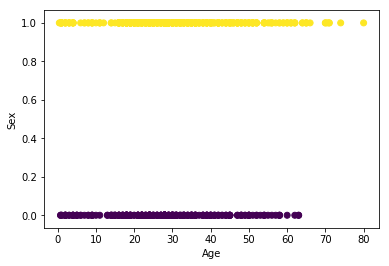

In [21]:
plt.scatter(data['Age'], data['Sex'], c=data['Sex'])
plt.xlabel('Age')
plt.ylabel('Sex')

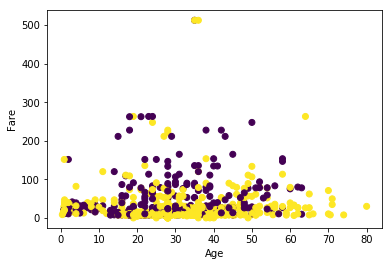

In [22]:
plt.scatter(data['Age'], data['Fare'], c=data['Sex'])
plt.xlabel('Age')
plt.ylabel('Fare')

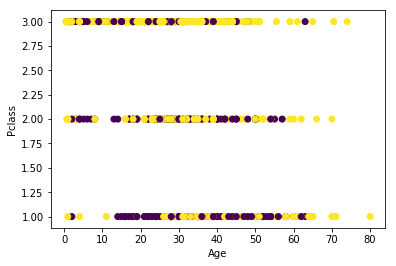

In [23]:
plt.scatter(data['Age'], data['Pclass'], c=data['Sex'])
plt.xlabel('Age')
plt.ylabel('Pclass')

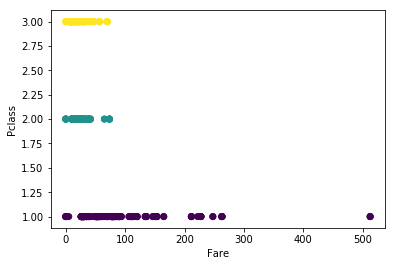

In [24]:
plt.scatter(data['Fare'], data['Pclass'], c=data['Pclass'])
plt.xlabel('Fare')
plt.ylabel('Pclass')

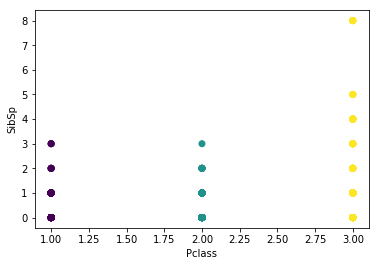

In [25]:
plt.scatter(data['Pclass'], data['SibSp'], c=data['Pclass'])
plt.xlabel('Pclass')
plt.ylabel('SibSp')

-------------------------------

#### Задание*

Для тех, кто на прошлом занятии игрался с knn.ipynb, предлагается применить knn к полученным данным, а потом получить ответы на данные из test_titakin.csv и загрузить в соревнование: https://www.kaggle.com/c/titanic. Какой результат получился и при каких k?